********* THIS IS CMD FOR NGC 411 ************


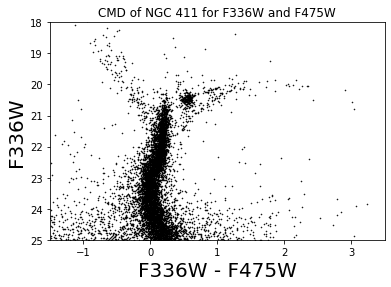

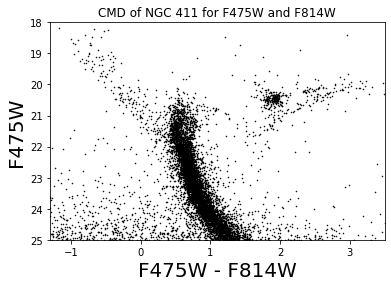

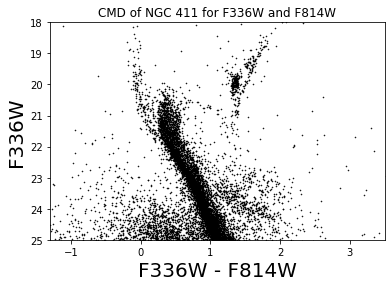

loading of data is completed in [4.374765634536743] seconds


In [101]:
#%matplotlib qt  
%matplotlib inline

import time
start_time = time.time()

import math
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy.stats import zscore

my_data_1 = np.loadtxt('inner_1')
x_data_1 = my_data_1[:,2]   # f336w - f475w
y_data_1 = my_data_1[:,0]   # f336w

my_data_2 = np.loadtxt('inner_2')
x_data_2 = my_data_2[:,2]   # f475w - f814w
y_data_2 = my_data_2[:,0]   # f475w 

my_data_3 = np.loadtxt('inner_3')
x_data_3 = my_data_3[:,2]   # f336w - f814w
y_data_3 = my_data_3[:,0]   # f336w

print("********* THIS IS CMD FOR NGC 411 ************")
plt.figure()
plt.scatter(x_data_1, y_data_1, 0.3, 'black')
plt.xlim(-1.5, 3.5)
plt.ylim(18, 25)
plt.gca().invert_yaxis()
plt.xlabel("F336W - F475W", fontsize=20)
plt.ylabel("F336W", fontsize=20)
plt.title('CMD of NGC 411 for F336W and F475W', fontsize=12)
plt.show()

plt.figure()
plt.scatter(x_data_2, y_data_2, 0.3, 'black')
plt.xlim(-1.3, 3.5)
plt.ylim(18, 25)
plt.gca().invert_yaxis()
plt.xlabel("F475W - F814W", fontsize=20)
plt.ylabel("F475W", fontsize=20)
plt.title('CMD of NGC 411 for F475W and F814W', fontsize=12)
plt.show() 

plt.figure()
plt.scatter(x_data_3, y_data_3, 0.3, 'black')
plt.xlim(-1.3 , 3.5)
plt.ylim(18, 25)
plt.gca().invert_yaxis()
plt.xlabel("F336W - F814W", fontsize=20)
plt.ylabel("F336W", fontsize=20)
plt.title('CMD of NGC 411 for F336W and F814W', fontsize=12)
plt.show()

print('loading of data is completed in [{}] seconds'.format(time.time() - start_time))


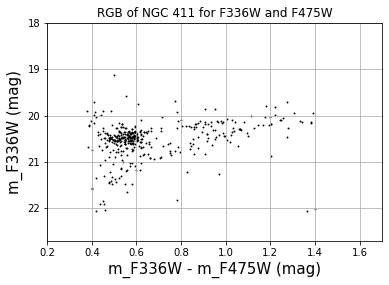

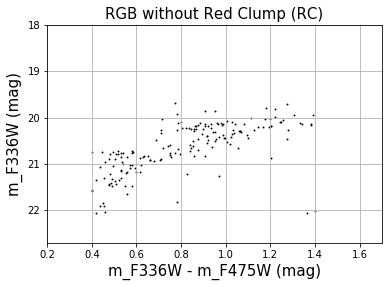

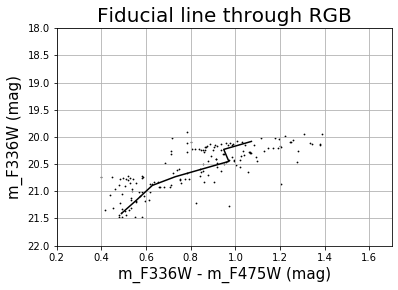

/home/shalmalee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


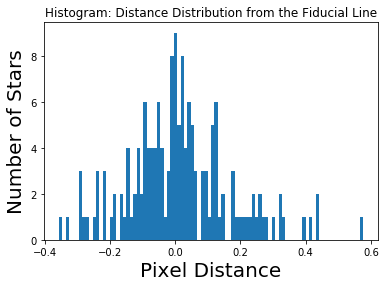

In [138]:
# ***************************F336W and F475W****************************************************

# For F336W and F475W filters:
first_df = pd.DataFrame({'x_data_1':x_data_1, 'y_data_1':y_data_1})
#print(first_df)
first_df_cut = first_df[(first_df['x_data_1']<=1.4) & (first_df['x_data_1']>= 0.38) & (first_df['y_data_1']<=22.1) & (first_df['y_data_1']>=19.1)]
#print(first_df_cut)
first_df_cut_index = first_df_cut[(first_df_cut.x_data_1 < 0.67) & (first_df_cut.y_data_1 < 20.7)].index.to_numpy()
first_df_cut_1 = first_df_cut.drop(first_df_cut_index)


plt.figure()
plt.grid()
plt.scatter(first_df_cut.x_data_1, first_df_cut.y_data_1, 0.8, 'black')
plt.xlim(0.2,1.7)
plt.ylim(18.0, 22.7)
plt.xlabel('m_F336W - m_F475W (mag)', fontsize=15)
plt.ylabel('m_F336W (mag)', fontsize=15)
plt.title("RGB of NGC 411 for F336W and F475W", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.grid()
plt.scatter(first_df_cut_1.x_data_1, first_df_cut_1.y_data_1, 0.8, 'black')
plt.xlim(0.2,1.7)
plt.ylim(18.0, 22.7)
plt.xlabel('m_F336W - m_F475W (mag)', fontsize=15)
plt.ylabel('m_F336W (mag)', fontsize=15)
plt.title("RGB without Red Clump (RC)", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

#define a dataframe for x data and y data
first_df_new= pd.DataFrame({'x_data_1':first_df_cut_1.x_data_1,'y_data_1':first_df_cut_1.y_data_1})
#print(df_new)

first_df1_new = first_df_new[(first_df_new['x_data_1']<=1.4) & (first_df_new['x_data_1']>= 0.25) & (first_df_new['y_data_1']<=21.5) & (first_df_new['y_data_1']>=19.9)]
#print(df1_new)
bins = np.linspace(19.9,21.5, num=8) # These are number of bins

md = pd.DataFrame(np.zeros(((len(bins)-1), 2)), columns=['x_med','y_med'])
#print(md)

for i in range(len(bins)-1):
    tempdf = first_df1_new[(first_df1_new['y_data_1'] >= bins[i]) & (first_df1_new['y_data_1'] <= bins[i+1]) ]
    x_median = np.median(tempdf['x_data_1'])
    y_median = np.median(tempdf['y_data_1'])
    md.iloc[i]=[x_median, y_median]
    
#print(md)

plt.figure()
plt.plot(md['x_med'], md['y_med'], 'black')
plt.grid()
plt.scatter(first_df1_new['x_data_1'], first_df1_new['y_data_1'], 0.6, 'black', zorder=0) # zorder= is used when you are lazy. 
plt.xlim(0.2, 1.7)
plt.ylim(18, 22)
plt.xlabel('m_F336W - m_F475W (mag)', fontsize=15)
plt.ylabel('m_F336W (mag)', fontsize=15)
plt.title("Fiducial line through RGB", fontsize=20)
plt.gca().invert_yaxis() # Again. When you are lazy, use this. Being lazy is good and easy. 
plt.show()

first_a = pd.cut(first_df1_new.y_data_1, bins)
first_b = first_df1_new.groupby(['y_data_1', first_a]).y_data_1.median()

first_df2 = pd.DataFrame({'values':first_b})
np.savetxt('cut_group_1.txt', first_df2)

first_df1_new['x_diff_new_1'] = first_df1_new.groupby(first_a).apply(lambda grp: grp.x_data_1 - grp.x_data_1.median()).values
plt.hist(first_df1_new.x_diff_new_1, bins=90)
plt.title('Histogram: Distance Distribution from the Fiducial Line', fontsize=12)
plt.xlabel('Pixel Distance' ,fontsize=20)
plt.ylabel('Number of Stars', fontsize=20)
#plt.xlim(-0.20, 0.21)
plt.show()
# ******************************************End of F336W and F475W*****

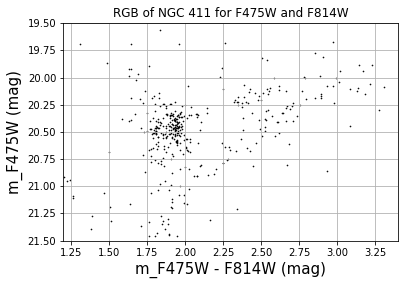

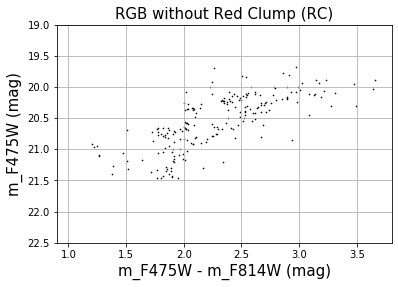

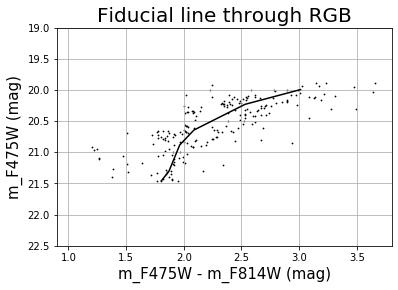

/home/shalmalee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


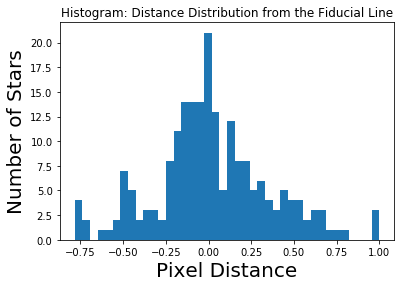

In [98]:
# ******************************************Start of F475W and F814W**************************************

# For F475W and F814W filters 
second_df = pd.DataFrame({'x_data_2':x_data_2, 'y_data_2':y_data_2})
#print(second_df)
second_df_cut = second_df[(second_df['x_data_2']<=3.7 ) & (second_df['x_data_2']>=1.2) & (second_df['y_data_2']<=21.5) & (second_df['y_data_2']>=19.5)]
#print(second_df_cut)
second_df_cut_index = second_df_cut[(second_df_cut.x_data_2 < 2.00) & (second_df_cut.y_data_2 <20.65 )].index.to_numpy()
second_df_cut_1 = second_df_cut.drop(second_df_cut_index)


plt.figure()
plt.grid()
#plt.scatter(x_data_2, y_data_2, 0.3, 'red')
plt.scatter(second_df_cut.x_data_2, second_df_cut.y_data_2, 0.4, 'black')
plt.xlim(1.2,3.4)
plt.ylim(19.5, 21.5)
plt.xlabel('m_F475W - F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("RGB of NGC 411 for F475W and F814W", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.grid()
plt.scatter(second_df_cut_1.x_data_2, second_df_cut_1.y_data_2, 0.4, 'black')
plt.xlim(0.9,3.8)
plt.ylim(19.0, 22.5)
plt.xlabel('m_F475W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("RGB without Red Clump (RC)", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

#define a dataframe for x data and y data
second_df_new= pd.DataFrame({'x_data_2':second_df_cut_1.x_data_2,'y_data_2':second_df_cut_1.y_data_2})
#print(df_new)

second_df1_new = second_df_new[(second_df_new['x_data_2']<=3.7) & (second_df_new['x_data_2']>=1.2 ) & (second_df_new['y_data_2']<=21.6) & (second_df_new['y_data_2']>=19.85)]
#print(df1_new)
bins = np.linspace(19,22.5, num=11) # These are number of bins

md = pd.DataFrame(np.zeros(((len(bins)-1), 2)), columns=['x_med','y_med'])
#print(md)

for i in range(len(bins)-1):
    tempdf = second_df1_new[(second_df1_new['y_data_2'] >= bins[i]) & (second_df1_new['y_data_2'] <= bins[i+1]) ]
    x_median = np.median(tempdf['x_data_2'])
    y_median = np.median(tempdf['y_data_2'])
    md.iloc[i]=[x_median, y_median]
    
#print(md)
plt.figure()
plt.plot(md['x_med'], md['y_med'], 'black')
plt.grid()
plt.scatter(second_df1_new['x_data_2'], second_df1_new['y_data_2'], 0.6, 'black', zorder=0) # zorder= is used when you are lazy. 
plt.xlim(0.9, 3.8)
plt.ylim(19.0, 22.5)
plt.xlabel('m_F475W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("Fiducial line through RGB", fontsize=20)
plt.gca().invert_yaxis() # Again. When you are lazy, use this. Being lazy is good and easy. 
plt.show()

second_a = pd.cut(second_df1_new.y_data_2, bins)
second_b = second_df1_new.groupby(['y_data_2', second_a]).y_data_2.median()

second_df2 = pd.DataFrame({'values':second_b})
np.savetxt('cut_group_1.txt', second_df2)

second_df1_new['x_diff_new_2'] = second_df1_new.groupby(second_a).apply(lambda grp: grp.x_data_2 - grp.x_data_2.median()).values
plt.hist(second_df1_new.x_diff_new_2, bins=40)
plt.title('Histogram: Distance Distribution from the Fiducial Line', fontsize=12)
plt.xlabel('Pixel Distance' ,fontsize=20)
plt.ylabel('Number of Stars', fontsize=20)
#plt.xlim(-0.20, 0.21)
plt.show()
# ********************************************End of F475W and F814W***

In [ ]:
# ********************************************Start of F336W and F814W**************************************************

# For F336W and F814W filters
third_df = pd.DataFrame({'x_data_3':x_data_3, 'y_data_3':y_data_3})
#print(third_df)
third_df_cut = third_df[(third_df['x_data_3']<=3.5) & (third_df['x_data_3']>= 1.6) & (third_df['y_data_3']<=22) & (third_df['y_data_3']>=19.8)]
#print(third_df_cut)
third_df_cut_index = third_df_cut[(third_df_cut.x_data_3 < 2.1) & (third_df_cut.y_data_3 < 20.76)].index.to_numpy()
third_df_cut_1 = third_df_cut.drop(third_df_cut_index)
print(len(third_df_cut_1))

plt.figure()
plt.grid()
plt.scatter(third_df_cut.x_data_3, third_df_cut.y_data_3, 0.4, 'black')
#plt.xlim(1.0,3.6)
#plt.ylim(19.5, 22.3)
plt.xlabel('m_F475W - F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("RGB of NGC 411 for F336W and F814W", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.grid()
plt.scatter(third_df_cut_1.x_data_3, third_df_cut_1.y_data_3, 0.4, 'black')
#plt.xlim(1.0,3.6)
#plt.ylim(19.5, 22.3)
plt.xlabel('m_F475W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("RGB without Red Clump (RC)", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

#define a dataframe for x data and y data
third_df_new= pd.DataFrame({'x_data_3':third_df_cut_1.x_data_3,'y_data_3':third_df_cut_1.y_data_3})
#print(df_new)

third_df1_new = third_df_new[(third_df_new['x_data_3']<=3.5) & (third_df_new['x_data_3']>= 1.5) & (third_df_new['y_data_3']<=22) & (third_df_new['y_data_3']>=19.5)]
#print(df1_new)
bins = np.linspace(19.5,22.3, num=6) # These are number of bins

md = pd.DataFrame(np.zeros(((len(bins)-1), 2)), columns=['x_med','y_med'])
#print(md)

for i in range(len(bins)-1):
    tempdf = third_df1_new[(third_df1_new['y_data_3'] >= bins[i]) & (third_df1_new['y_data_3'] <= bins[i+1]) ]
    x_median = np.median(tempdf['x_data_3'])
    y_median = np.median(tempdf['y_data_3'])
    md.iloc[i]=[x_median, y_median]
    
#print(md)

plt.figure()
plt.plot(md['x_med'], md['y_med'], 'black')
plt.grid()
plt.scatter(third_df1_new['x_data_3'], third_df1_new['y_data_3'], 0.6, 'black', zorder=0) # zorder= is used when you are lazy. 
#plt.xlim(1.45, 3.5)
#plt.ylim(19.7, 21.9)
plt.xlabel('m_F336W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F336W (mag)', fontsize=15)
plt.title("Fiducial line through RGB", fontsize=20)
plt.gca().invert_yaxis() # Again. When you are lazy, use this. Being lazy is good and easy. 
plt.show()

third_a = pd.cut(third_df1_new.y_data_3, bins)
third_b = third_df1_new.groupby(['y_data_3', third_a]).y_data_3.median()

third_df2 = pd.DataFrame({'values':third_b})
np.savetxt('cut_group_1.txt', third_df2)

third_df1_new['x_diff_new_3'] = third_df1_new.groupby(third_a).apply(lambda grp: grp.x_data_3 - grp.x_data_3.median()).values
plt.hist(third_df1_new.x_diff_new_3, bins=250)
plt.title('Histogram: Distance Distribution from the Fiducial Line', fontsize=12)
plt.xlabel('Pixel Distance' ,fontsize=20)
plt.ylabel('Number of Stars', fontsize=20)
#plt.xlim(-0.10, 0.11)
plt.show()

#*****************************************End of F336W and F814W*******

Text(0.5, 1.0, 'Kernel Density Estimation (KDE) for NGC 411')

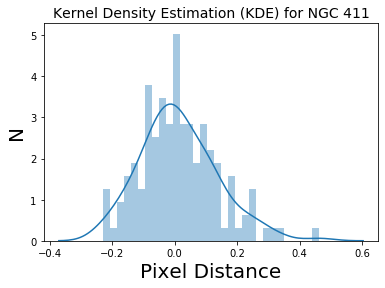

In [90]:
sns.distplot(first_df1_new.x_diff_new_1, 31)
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.title('Kernel Density Estimation (KDE) for NGC 411', fontsize=14)

Text(0.5, 1.0, 'Kernel Density Estimation (KDE) for NGC 411')

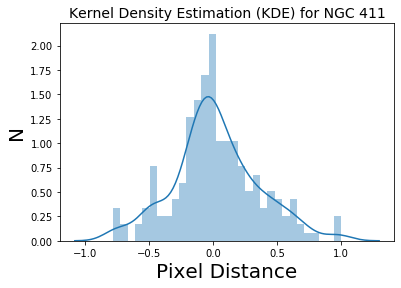

In [91]:
sns.distplot(second_df1_new.x_diff_new_2, 31)
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.title('Kernel Density Estimation (KDE) for NGC 411', fontsize=14)

Text(0.5, 1.0, 'Kernel Density Estimation (KDE) for NGC 411')

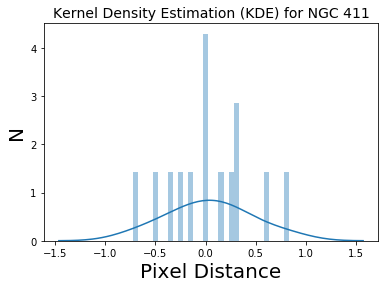

In [92]:
sns.distplot(third_df1_new.x_diff_new_3, 31)
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.title('Kernel Density Estimation (KDE) for NGC 411', fontsize=14)

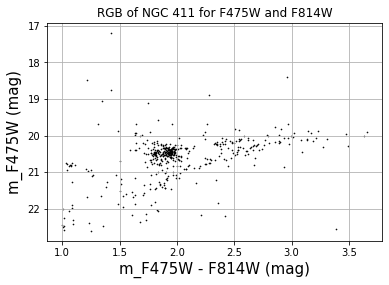

In [93]:
second_df = pd.DataFrame({'x_data_2':x_data_2, 'y_data_2':y_data_2})
#print(second_df)
second_df_cut = second_df[(second_df['x_data_2']<=3.7 ) & (second_df['x_data_2']>=1.0) & (second_df['y_data_2']<=22.6) & (second_df['y_data_2']>=17)]
#print(second_df_cut)
second_df_cut_index = second_df_cut[(second_df_cut.x_data_2 < 1.40 ) & (second_df_cut.y_data_2 <20.2 )].index.to_numpy()
second_df_cut_1 = second_df_cut.drop(second_df_cut_index)


plt.figure()
plt.grid()
plt.scatter(second_df_cut.x_data_2, second_df_cut.y_data_2, 0.4, 'black')
#plt.xlim(1.25,2.4)
#plt.ylim(18.0, 22.5)
plt.xlabel('m_F475W - F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("RGB of NGC 411 for F475W and F814W", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

Text(0.5, 1.0, 'Kernel Density Estimation (KDE) for NGC 411')

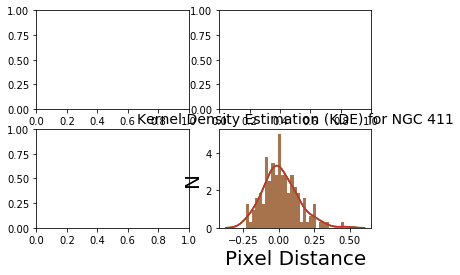

In [94]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1=sns.distplot(first_df1_new.x_diff_new_1, 31)
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.title('Kernel Density Estimation (KDE) for NGC 411', fontsize=14)
ax2=sns.distplot(first_df1_new.x_diff_new_1, 31)
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.title('Kernel Density Estimation (KDE) for NGC 411', fontsize=14)
ax3=sns.distplot(first_df1_new.x_diff_new_1, 31)
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.title('Kernel Density Estimation (KDE) for NGC 411', fontsize=14)
ax4= sns.distplot(first_df1_new.x_diff_new_1, 31)
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.title('Kernel Density Estimation (KDE) for NGC 411', fontsize=14)

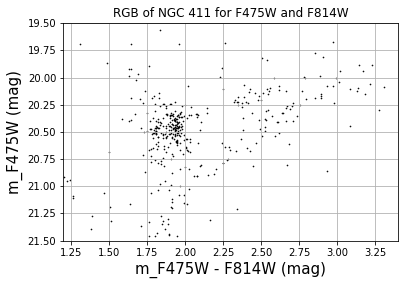

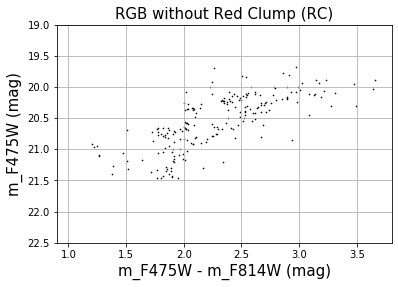

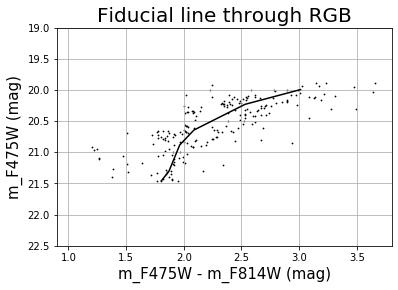

/home/shalmalee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


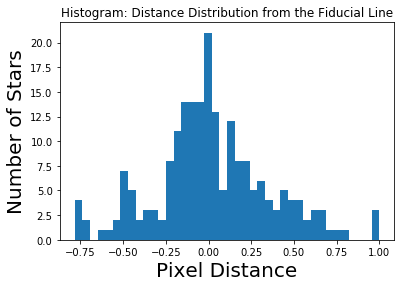

In [95]:
# For F475W and F814W filters 
second_df = pd.DataFrame({'x_data_2':x_data_2, 'y_data_2':y_data_2})
#print(second_df)
second_df_cut = second_df[(second_df['x_data_2']<=3.7 ) & (second_df['x_data_2']>=1.2) & (second_df['y_data_2']<=21.5) & (second_df['y_data_2']>=19.5)]
#print(second_df_cut)
second_df_cut_index = second_df_cut[(second_df_cut.x_data_2 < 2.00) & (second_df_cut.y_data_2 <20.65 )].index.to_numpy()
second_df_cut_1 = second_df_cut.drop(second_df_cut_index)


plt.figure()
plt.grid()
#plt.scatter(x_data_2, y_data_2, 0.3, 'red')
plt.scatter(second_df_cut.x_data_2, second_df_cut.y_data_2, 0.4, 'black')
plt.xlim(1.2,3.4)
plt.ylim(19.5, 21.5)
plt.xlabel('m_F475W - F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("RGB of NGC 411 for F475W and F814W", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.grid()
plt.scatter(second_df_cut_1.x_data_2, second_df_cut_1.y_data_2, 0.4, 'black')
plt.xlim(0.9,3.8)
plt.ylim(19.0, 22.5)
plt.xlabel('m_F475W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("RGB without Red Clump (RC)", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

#define a dataframe for x data and y data
second_df_new= pd.DataFrame({'x_data_2':second_df_cut_1.x_data_2,'y_data_2':second_df_cut_1.y_data_2})
#print(df_new)

second_df1_new = second_df_new[(second_df_new['x_data_2']<=3.7) & (second_df_new['x_data_2']>=1.2 ) & (second_df_new['y_data_2']<=21.6) & (second_df_new['y_data_2']>=19.85)]
#print(df1_new)
bins = np.linspace(19,22.5, num=11) # These are number of bins

md = pd.DataFrame(np.zeros(((len(bins)-1), 2)), columns=['x_med','y_med'])
#print(md)

for i in range(len(bins)-1):
    tempdf = second_df1_new[(second_df1_new['y_data_2'] >= bins[i]) & (second_df1_new['y_data_2'] <= bins[i+1]) ]
    x_median = np.median(tempdf['x_data_2'])
    y_median = np.median(tempdf['y_data_2'])
    md.iloc[i]=[x_median, y_median]
    
#print(md)
plt.figure()
plt.plot(md['x_med'], md['y_med'], 'black')
plt.grid()
plt.scatter(second_df1_new['x_data_2'], second_df1_new['y_data_2'], 0.6, 'black', zorder=0) # zorder= is used when you are lazy. 
plt.xlim(0.9, 3.8)
plt.ylim(19.0, 22.5)
plt.xlabel('m_F475W - m_F814W (mag)', fontsize=15)
plt.ylabel('m_F475W (mag)', fontsize=15)
plt.title("Fiducial line through RGB", fontsize=20)
plt.gca().invert_yaxis() # Again. When you are lazy, use this. Being lazy is good and easy. 
plt.show()

second_a = pd.cut(second_df1_new.y_data_2, bins)
second_b = second_df1_new.groupby(['y_data_2', second_a]).y_data_2.median()

second_df2 = pd.DataFrame({'values':second_b})
np.savetxt('cut_group_1.txt', second_df2)

second_df1_new['x_diff_new_2'] = second_df1_new.groupby(second_a).apply(lambda grp: grp.x_data_2 - grp.x_data_2.median()).values
plt.hist(second_df1_new.x_diff_new_2, bins=40)
plt.title('Histogram: Distance Distribution from the Fiducial Line', fontsize=12)
plt.xlabel('Pixel Distance' ,fontsize=20)
plt.ylabel('Number of Stars', fontsize=20)
#plt.xlim(-0.20, 0.21)
plt.show()

Text(0.5, 1.0, 'Kernel Density Estimation (KDE) for NGC 411')

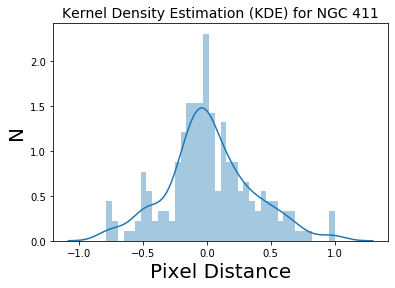

In [96]:
sns.distplot(second_df1_new.x_diff_new_2, 40)
plt.xlabel('Pixel Distance', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.title('Kernel Density Estimation (KDE) for NGC 411', fontsize=14)